##数据可视化常用图表
常用的图表有：折线图、柱形图、条形图、散点图、气泡图、面积图、树图、雷达图、箱形图、饼图、圆环图、热力图、水平线和垂直线、双折线图、线柱图、双坐标轴图等。

In [2]:
#导入库
import matplotlib as mpl
import matplotlib.pyplot as plt 
#让图表直接在Jupyter Notebook中展示出来
%matplotlib inline  
#解决windows电脑中文乱码问题
mpl.rcParams["font.sans-serif"] = ["SimHei"]
#解决mac电脑中文乱码问题
mpl.rcParams["font.sans-serif"] = ["Arial Unicode MS"]
#解决负号无法正常显示的问题
mpl.rcParams["axes.unicode_minus"] = False
%config InlineBackend.figure_format='svg' #解决默认设置下matplotlib做出来的图表不清晰的问题，将图表设置成矢量图格式
plt.figure(figsize=(8,6)) #建立宽为8高为6的画布， figsize参数用来设置参数

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

# 绘制折线图---plt.plot(x,y)

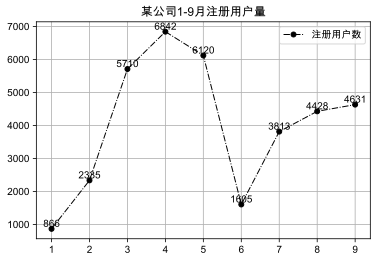

In [4]:
#案例：绘制某公司1-9月注册用户量的图表
#1-数值
import numpy as np
x=np.array([1,2,3,4,5,6,7,8,9])
y=np.array([866,2335,5710,6842,6120,1605,3813,4428,4631])

#2-建立坐标系并绘图
plt.subplot(1,1,1)
plt.plot(x,y,color='k',linestyle='dashdot',linewidth=1,marker='o',markersize=5,label='注册用户数')

#3-图表设置
plt.title("某公司1-9月注册用户量",loc='center')   #设置标题
for a,b in zip(x,y):
    plt.text(a,b,b,ha='center',va='bottom',fontsize=10)   #设置数据标签
plt.grid(True)   #设置网格线
plt.legend()   #设置图例，调用显示出plot中的label值

#4-保存图表到本地
plt.savefig('/Users/Eric/Documents/2019/python/picture/plot.jpg')

# 绘制柱形图---plt.bar(x)

(1)普通单柱形图

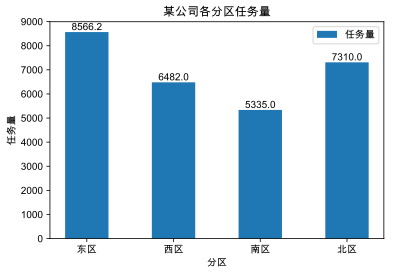

In [5]:
#案例：绘制某公司各分区任务量的图表
#1-数值
import numpy as np
x=np.array(['东区','西区','南区','北区'])
y=np.array([8566.2,6482,5335,7310])

#2-建立坐标系并绘图
plt.subplot(1,1,1)
plt.bar(x,y,width=0.5,align='center',label='任务量')

#3-图表设置
plt.title("某公司各分区任务量",loc='center')   #设置标题
for a,b in zip(x,y):
    plt.text(a,b,b,ha='center',va='bottom',fontsize=10)   #设置数据标签
#plt.grid(True)   #设置网格线
plt.legend()   #设置图例，调用显示出plot中的label值
plt.xlabel('分区')   #设置x轴名称
plt.ylabel('任务量')   #设置y轴名称

#4-保存图表到本地
plt.savefig('/Users/Eric/Documents/2019/python/picture/bar.jpg')

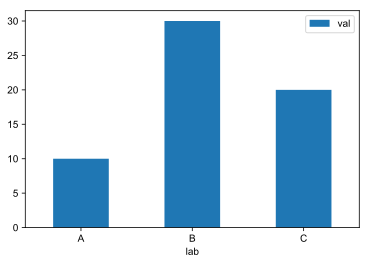

In [6]:
#画图函数：DataFrame.plot.bar(x=None, y=None, **kwds)[source],
#官方文档http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html
import pandas as pd
df = pd.DataFrame({'lab':['A', 'B', 'C'], 'val':[10, 30, 20]})
ax = df.plot.bar(x='lab', y='val', rot=0)

(2) 双柱形图--双柱形图用来表示不同类别随着同一变量的变化情况，绘制中要调整x的位置

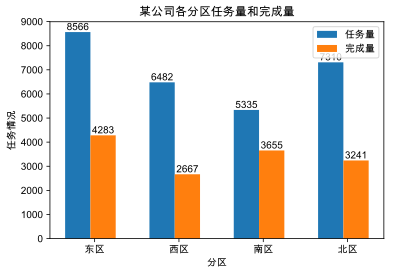

In [7]:
#案例：绘制某公司各分区任务量和完成量的图表
#1-数值
x=np.array([1,2,3,4])  #注意为了第二个柱形图位置的移动，这里的x需要是数值型,后面可以通过设置X刻度值实现文本化
y1=np.array([8566,6482,5335,7310])
y2=np.array([4283,2667,3655,3241])

#2-建立坐标系并绘图
plt.subplot(1,1,1)
plt.bar(x,y1,width=0.3,label='任务量')
plt.bar(x+0.3,y2,width=0.3,label='完成量')  #x+0.3，绘图位置的移动

#3-图表设置
plt.title("某公司各分区任务量和完成量",loc='center')   #设置标题
for a,b in zip(x,y1):
    plt.text(a,b,b,ha='center',va='bottom',fontsize=10)   #设置数据标签1
for a,b in zip(x+0.3,y2):
    plt.text(a,b,b,ha='center',va='bottom',fontsize=10)   #设置数据标签2，注意这里的x也要发生移动
plt.xlabel('分区')   #设置x轴名称
plt.ylabel('任务情况')   #设置y轴名称
plt.xticks(x+0.2,['东区','西区','南区','北区'])  #设置x轴刻度值，x+0.2表示刻度值的位置后移一点
#plt.grid(True)   #设置网格线
plt.legend()   #设置图例，调用显示出plot中的label值

#4-保存图表到本地
plt.savefig('/Users/Eric/Documents/2019/python/picture/bar2.jpg')

（3）堆积柱形图-堆积柱形图用来表示同类别和不同变量的总和差异，绘制中在相同位置绘制y即可，y会自动叠加

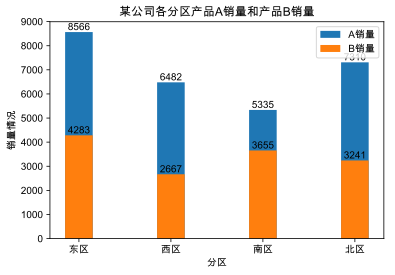

In [8]:
#案例：绘制某公司各分区产品A销量和产品B销量的图表
#1-数值
x=np.array(['东区','西区','南区','北区'])
y1=np.array([8566,6482,5335,7310])
y2=np.array([4283,2667,3655,3241])

#2-建立坐标系并绘图
plt.subplot(1,1,1)
plt.bar(x,y1,width=0.3,label='A销量')
plt.bar(x,y2,width=0.3,label='B销量')  

#3-图表设置
plt.title("某公司各分区产品A销量和产品B销量",loc='center')   #设置标题
for a,b in zip(x,y1):
    plt.text(a,b,b,ha='center',va='bottom',fontsize=10)   #设置数据标签1
for a,b in zip(x,y2):
    plt.text(a,b,b,ha='center',va='bottom',fontsize=10)   #设置数据标签2
plt.xlabel('分区')   #设置x轴名称
plt.ylabel('销量情况')   #设置y轴名称
#plt.grid(True)   #设置网格线
plt.legend()   #设置图例，调用显示出plot中的label值

#4-保存图表到本地
plt.savefig('/Users/Eric/Documents/2019/python/picture/bar3.jpg')

# 绘制条形图---plt.barh(x,width=y)

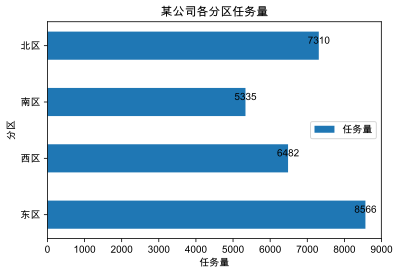

In [9]:
#案例：绘制某公司各分区任务量的图表
#1-数值
x=np.array(['东区','西区','南区','北区'])
y=np.array([8566,6482,5335,7310])

#2-建立坐标系并绘图
plt.subplot(1,1,1)
plt.barh(x,width=y,height=0.5,align='center',label='任务量')

#3-图表设置
plt.title("某公司各分区任务量",loc='center')   #设置标题
for a,b in zip(x,y):
    plt.text(b,a,b,ha='center',va='bottom',fontsize=10)   #设置y数据标签,因此b在最前面
#plt.grid(True)   #设置网格线
plt.legend()   #设置图例，调用显示出plot中的label值
plt.xlabel('任务量')   #设置x轴名称
plt.ylabel('分区')   #设置y轴名称

#4-保存图表到本地
plt.savefig('/Users/Eric/Documents/2019/python/picture/barh.jpg')

# 绘制散点图---plt.scatter(x,y)

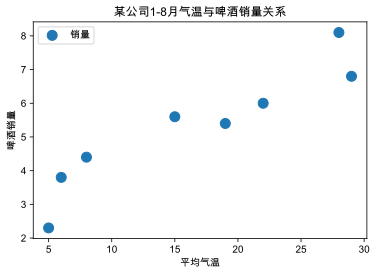

In [10]:
#案例：绘制1-8月气温与啤酒销量关系的图表
#1-数值
x=np.array([5,6,8,15,19,22,28,29])
y=np.array([2.3,3.8,4.4,5.6,5.4,6.0,8.1,6.8])

#2-建立坐标系并绘图
plt.subplot(1,1,1)
plt.scatter(x,y,marker='o',s=100,label='销量')

#3-图表设置
plt.title("某公司1-8月气温与啤酒销量关系",loc='center')   #设置标题
#for a,b in zip(x,y):
    #plt.text(b,a,b,ha='center',va='bottom',fontsize=10)   #设置y数据标签,因此b在最前面
#plt.grid(True)   #设置网格线
plt.legend()   #设置图例，调用显示出plot中的label值
plt.xlabel('平均气温')   #设置x轴名称
plt.ylabel('啤酒销量')   #设置y轴名称

#4-保存图表到本地
plt.savefig('/Users/Eric/Documents/2019/python/picture/scatter.jpg')

# 绘制气泡图---plt.scatter(x,y,s=y)

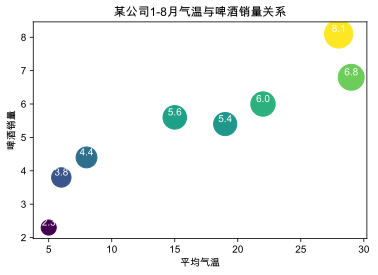

In [11]:
#案例：绘制1-8月气温与啤酒销量关系的图表
#1-数值
x=np.array([5,6,8,15,19,22,28,29])
y=np.array([2.3,3.8,4.4,5.6,5.4,6.0,8.1,6.8])
colors=y*10  #根据y值大小生成不同颜色，乘以10是为了让颜色区分更明显
area=y*100  #根据y值大小生成不同大小，乘以10是为了让大小区分更明显

#2-建立坐标系并绘图
plt.subplot(1,1,1)
plt.scatter(x,y,marker='o',s=area,c=colors,label='销量')

#3-图表设置
plt.title("某公司1-8月气温与啤酒销量关系",loc='center')   #设置标题
for a,b in zip(x,y):
    plt.text(a,b,b,ha='center',va='bottom',fontsize=10,color='white')   #设置y数据标签,因此b在最前面
#plt.grid(True)   #设置网格线
#plt.legend(loc='upper center')   #设置图例，调用显示出plot中的label值
plt.xlabel('平均气温')   #设置x轴名称
plt.ylabel('啤酒销量')   #设置y轴名称

#4-保存图表到本地
plt.savefig('/Users/Eric/Documents/2019/python/picture/scatter2.jpg')

# 绘制面积图---plt.stackplot(x,y)

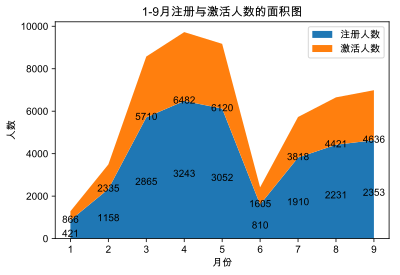

In [12]:
#案例：绘制1-9月注册与激活人数的面积图
#1-数值
x=np.array([1,2,3,4,5,6,7,8,9])
y1=np.array([866,2335,5710,6482,6120,1605,3818,4421,4636])
y2=np.array([421,1158,2865,3243,3052,810,1910,2231,2353])
labels=['注册人数','激活人数']

#2-建立坐标系并绘图
plt.subplot(1,1,1)
plt.stackplot(x,y1,y2,labels=labels)

#3-图表设置
plt.title("1-9月注册与激活人数的面积图",loc='center')   #设置标题
for a,b in zip(x,y1):
    plt.text(a,b,b,ha='center',va='center',fontsize=10)   #设置y1数据标签
for a,b in zip(x,y2):
    plt.text(a,b,b,ha='center',va='top',fontsize=10)   #设置y2数据标签
#plt.grid(True)   #设置网格线
plt.legend()   #设置图例
plt.xlabel('月份')   #设置x轴名称
plt.ylabel('人数')   #设置y轴名称

#4-保存图表到本地
plt.savefig('/Users/Eric/Documents/2019/python/picture/stackplot.jpg')

# 绘制树地图---squarify.plot()

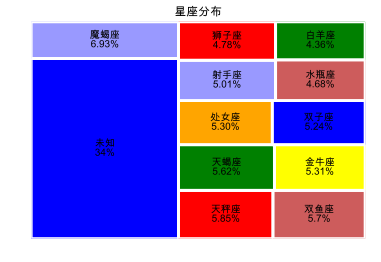

In [13]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
import squarify 

#案例：绘制星座分布树地图
#1-数值
size=np.array([3.4,0.693,0.585,0.570,0.562,0.531,0.530,0.524,0.501,0.478,0.468,0.436])   #待绘图的数据
labels=np.array(['未知','魔蝎座','天秤座','双鱼座','天蝎座','金牛座','处女座','双子座','射手座','狮子座','水瓶座','白羊座'])  #各类别文字标签
#各类别数值标签，必须是文本，数值会报错
values=np.array(['34%','6.93%','5.85%','5.7%','5.62%','5.31%','5.30%','5.24%','5.01%','4.78%','4.68%','4.36%']) 
colors=np.array(['blue','#9999ff','red','indianred','green','yellow','orange'])  #各类别颜色

#2-绘图
plot=squarify.plot(sizes=size,label=labels,value=values,color=colors,edgecolor='white',linewidth=3)

#3-图表设置
plt.title("星座分布",loc='center',fontdict={'fontsize':12})   #设置标题
plt.axis('off')   #去除坐标轴
#plt.grid(True)   #设置网格线
#plt.legend()   #设置图例
#plt.xlabel('月份')   #设置x轴名称
#plt.ylabel('人数')   #设置y轴名称

#4-保存图表到本地
plt.savefig('/Users/Eric/Documents/2019/python/picture/squarify.jpg')

# 绘制雷达图---plt.polar()

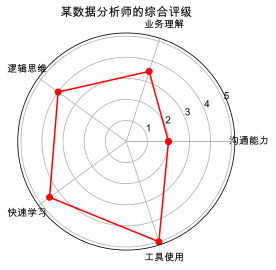

In [14]:
#案例：绘制某数据分析师的综合评级的雷达图
#1-数值
data=[2,3.5,4,4.5,5]   #要绘图的数据
dataLenth=5    #根据数据将圆分成5份
theta=np.linspace(0,2*np.pi,dataLenth,endpoint=False)   #np.linspace表示在指定的间隔内返回均匀间隔的数字
data=np.concatenate((data,[data[0]]))  #闭合,注意是2层括号哦
theta=np.concatenate((theta,[theta[0]]))    #闭合,注意是2层括号哦

#2-绘图
plt.polar(theta,data,color='r',marker='o')

#3-图表设置
plt.title("某数据分析师的综合评级",loc='center',fontdict={'fontsize':12})   #设置标题
labels=['沟通能力','业务理解','逻辑思维','快速学习','工具使用'] 
plt.xticks(theta,labels)

#4-保存图表到本地
plt.savefig('/Users/Eric/Documents/2019/python/picture/polar.jpg')

# 绘制箱形图---plt.boxplot()

No handles with labels found to put in legend.


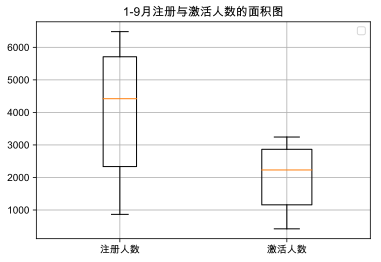

In [15]:
#案例：绘制1-9月注册与激活人数的箱形图
#1-数值
y1=np.array([866,2335,5710,6482,6120,1605,3818,4421,4636])
y2=np.array([421,1158,2865,3243,3052,810,1910,2231,2353])
x=[y1,y2]
labels=['注册人数','激活人数']

#2-建立坐标系并绘图
plt.subplot(1,1,1)
plt.boxplot(x,labels=labels,vert=True,widths=[0.2,0.3])

#3-图表设置
plt.title("1-9月注册与激活人数的面积图",loc='center')   #设置标题
plt.grid(True)   #设置网格线
plt.legend()   #设置图例
#plt.xlabel('月份')   #设置x轴名称
#plt.ylabel('人数')   #设置y轴名称

#4-保存图表到本地
plt.savefig('/Users/Eric/Documents/2019/python/picture/boxplot.jpg')

# 绘制饼图---plt.pie()

# 绘制圆环图---plt.pie()

# 绘制热力图---plt.imshow()

# 绘制水平线和垂直线---plt.axhline(y,xmin,xmax) & plt.axvline(x,ymin,ymax)

# 折线图+折线图/折线图+柱形图

# 双y轴图表/双x轴图表---plt.twinx()/plt.twiny()

# 绘图样式设置---plt.style.use(样式名)

In [16]:
#查看样式
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

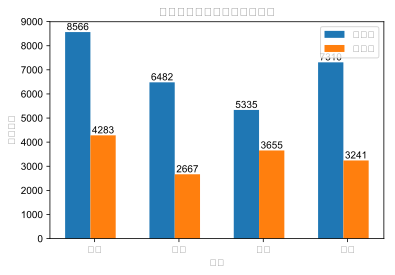

In [17]:
#调用样式
#案例：绘制某公司各分区任务量和完成量的图表
#1-数值
x=np.array([1,2,3,4])  #注意为了第二个柱形图位置的移动，这里的x需要是数值型,后面可以通过设置X刻度值实现文本化
y1=np.array([8566,6482,5335,7310])
y2=np.array([4283,2667,3655,3241])

#2-建立坐标系并绘图
plt.subplot(1,1,1)
plt.bar(x,y1,width=0.3,label='任务量')
plt.bar(x+0.3,y2,width=0.3,label='完成量')  #x+0.3，绘图位置的移动

#3-图表设置
plt.title("某公司各分区任务量和完成量",loc='center')   #设置标题
for a,b in zip(x,y1):
    plt.text(a,b,b,ha='center',va='bottom',fontsize=10)   #设置数据标签1
for a,b in zip(x+0.3,y2):
    plt.text(a,b,b,ha='center',va='bottom',fontsize=10)   #设置数据标签2，注意这里的x也要发生移动
plt.xlabel('分区')   #设置x轴名称
plt.ylabel('任务情况')   #设置y轴名称
plt.xticks(x+0.2,['东区','西区','南区','北区'])  #设置x轴刻度值，x+0.2表示刻度值的位置后移一点
#plt.grid(True)   #设置网格线
plt.legend()   #设置图例，调用显示出plot中的label值
plt.style.use('seaborn-white')  #设置绘图样式

#4-保存图表到本地
#plt.savefig('/Users/Eric/Documents/2019/python/picture/bar2.jpg')

# 本关作业